In [1]:
ls


1cpu.sh                 jvenv/                         tf_request_250204.sh
cpu_jupyter_error.txt   request_cpu_process_250226.sh  torch_request_250210.sh
cpu_jupyter_output.txt  tf_jupyter_error1.txt          ubuntu_latest.sif*
cpu_only.sh             tf_jupyter_error.txt           window.sh
gpu_test.ipynb          tf_jupyter_output1.txt
jvene_request_3116.sh   tf_jupyter_output.txt


In [1]:
cd ~/MultiFidelity-ProcessOpt/1.\ Code

/users/k23070952/MultiFidelity-ProcessOpt/1. Code


/users/k23070952/CODE/0. SSH files/jvenv/lib/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/users/k23070952/CODE/0. SSH files/jvenv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from ShortCutDesign import ShortCutDesign 
from RigorousDesign import RigorousDesign 

/users/k23070952/CODE/0. SSH files/jvenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Define the bounds as per the given function
bounds = [
    (10, 50),           # Number of stages in extractor
    (0, 0.9999), (0, 0.9999),  # Light key, heavy key for extract distiller
    (0, 0.9999), (0, 0.9999),  # Light key, heavy key for acetic_acid_purification
    (273, 350),         # Temperature for HX
    (0, 0.9999), (0, 0.9999)   # Light key, heavy key for raffinate distiller
]

# Safe parameter generation
def generate_valid_param(low, high, epsilon=1e-4):
    value = np.random.uniform(low, high)
    return max(min(value, high - epsilon), low + epsilon)


# Example shortcut and rigorous result generation functions
def calculate_shortcut(_init_params):
    # Placeholder for the actual shortcut model computation
    shortcut_model = ShortCutDesign()
    shortcut_results = shortcut_model.shortcut_results(_init_params)
    return shortcut_results

def calculate_rigorous(_init_params):
    shortcut_results = calculate_shortcut(_init_params)
    if shortcut_results['CAPEX'] == 0:
        return (shortcut_results, [0, 0, 0])
    
    if shortcut_results['CAPEX'] is None or np.isnan(shortcut_results['CAPEX']):
        return (shortcut_results, [0, 0, 0])

    RigorousCal = RigorousDesign()
    Rigorous_results = RigorousCal.check_results(_init_params, shortcut_results)
    # Placeholder for the actual rigorous model computation
    return (shortcut_results, Rigorous_results)

# Random search with n iterations
n_iterations = 4000
results = []

error_list = []
error_params = []

# 저장할 파일 이름
results_file = './results.csv'
error_file = './errors.csv'

# 첫 번째 iteration에서는 헤더를 작성하도록 설정
first_results = True
first_errors = True

for _ in tqdm(range(n_iterations)):
    # Generate random parameters within the bounds
    print(f"\n--- Iteration {_+1} Start ---")
    
    try:
        # Generate random parameters with safe boundaries
        params = [
                int(np.random.uniform(low, high)) if idx == 0 else generate_valid_param(low, high)
                for idx, (low, high) in enumerate(bounds)
            ]
        print(f"Generated Parameters: {params}")
        # Calculate shortcut and rigorous results
        shortcut_obj, rigorous_obj = calculate_rigorous(params)
        
        # Combine all results in a single record
        record = params + [
            shortcut_obj['CAPEX'], shortcut_obj['OPEX'], shortcut_obj['AceticAcidWt'], shortcut_obj['boilup_1'], 
            shortcut_obj['SplitRatio'], shortcut_obj['N_stages_1'], shortcut_obj['feed_stage_1'], shortcut_obj['shortcut_time'], 
            rigorous_obj[0], rigorous_obj[1], rigorous_obj[2], Rigorous_results[3]
        ]
        print(f"Results Recorded: {record}")
        results.append(record)

        # 실시간으로 CSV에 저장
        df = pd.DataFrame([record])
        
        # 헤더는 첫 번째 iteration에서만 작성
        df.to_csv(results_file, mode='a', header=first_results, index=False)
        first_results = False
        
    except Exception as e:
        print(f"Error: {e}")
        error_list.append(str(e))
        error_params.append(params)

        # 오류도 실시간으로 CSV에 저장
        error_df = pd.DataFrame([[params, str(e)]], columns=['Params', 'Error'])
        error_df.to_csv(error_file, mode='a', header=first_errors, index=False)
        first_errors = False

    print(f"--- Iteration {_+1} End ---\n")





columns = [
    'Stages', '_Lr1', '_Hr1',
    '_Lr2', '_Hr2', '_T_hex',
    '_Lr3', '_Hr3',
    'Shortcut_CAPEX', 'Shortcut_OPEX', 'Shortcut_AceticAcidWt',
    'Shortcut_BoilupRatio', 'Shortcut_SplitRatio',
    'Shortcut_NumberStages', 'Shortcut_FeedStage',
    'Rigorous_CAPEX', 'Rigorous_OPEX', 'Rigorous_AceticAcidWt'
]


# Create dataframe
results_df = pd.DataFrame(results, columns=columns)

  0%|          | 0/4000 [00:00<?, ?it/s]


--- Iteration 1 Start ---
Generated Parameters: [31, 0.5373729190726351, 0.2775994825931839, 0.4083841011490139, 0.21865390633420717, 336.6727024618185, 0.3667715937693913, 0.4297009321504676]
stages: 12
 ##### An instance of the 'ShortCutDesign' class  has been initialised!
[31, 0.5373729190726351, 0.2775994825931839, 0.4083841011490139, 0.21865390633420717, 336.6727024618185, 0.3667715937693913, 0.4297009321504676]
stages: 31
setting base model
setting model:  {'BoilupRatio': 4.48, 'Distillate': None, 'SplitRatio': 0.287, 'NumberStages': 9, 'FeedStage': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[31, 0.5373729190726351, 0.2775994825931839, 0.4083841011490139, 0.21865390633420717, 336.6727024618185, 0.3667715937693913, 0.4297009321504676]
setting model:  {'CAPEX': 1.214, 'OPEX': 2.003, 'AceticAcidWt': 0.015069556974177412, 'BoilupRatio': 1.4640524970419906, 'Distillate': <SuperpositionOutlet: s9>, 'SplitRatio': 0.013806706114398418, 'NumberStag

  0%|          | 1/4000 [00:14<15:42:10, 14.14s/it]

Results Recorded: [31, 0.5373729190726351, 0.2775994825931839, 0.4083841011490139, 0.21865390633420717, 336.6727024618185, 0.3667715937693913, 0.4297009321504676, 1.214, 2.003, 0.015069556974177412, 1.4640524970419906, 0.013806706114398418, 2, 2, 0.9976, 1.7586, 0.04077130030510722]
--- Iteration 1 End ---


--- Iteration 2 Start ---
Generated Parameters: [43, 0.6304789995006447, 0.021029077831127483, 0.9245645531400635, 0.8082463982669218, 340.31623496128793, 0.47015168571154164, 0.30071821481675465]
stages: 12
 ##### An instance of the 'ShortCutDesign' class  has been initialised!
[43, 0.6304789995006447, 0.021029077831127483, 0.9245645531400635, 0.8082463982669218, 340.31623496128793, 0.47015168571154164, 0.30071821481675465]
stages: 43


  0%|          | 2/4000 [00:18<9:20:28,  8.41s/it] 

capex_error
Results Recorded: [43, 0.6304789995006447, 0.021029077831127483, 0.9245645531400635, 0.8082463982669218, 340.31623496128793, 0.47015168571154164, 0.30071821481675465, None, 3.3094, 0.06337012011131299, 3.4697835489051227, 0.01380670611439842, -5, -2, 0, 0, 0]
--- Iteration 2 End ---


--- Iteration 3 Start ---
Generated Parameters: [41, 0.10301135260708838, 0.7211623340597623, 0.39425641029127134, 0.22471714753330468, 322.47280359202426, 0.3960612361943558, 0.7332734231118956]
stages: 12
 ##### An instance of the 'ShortCutDesign' class  has been initialised!
[41, 0.10301135260708838, 0.7211623340597623, 0.39425641029127134, 0.22471714753330468, 322.47280359202426, 0.3960612361943558, 0.7332734231118956]
stages: 41


  0%|          | 3/4000 [00:20<5:58:37,  5.38s/it]

setting base model
setting model:  {'BoilupRatio': 4.48, 'Distillate': None, 'SplitRatio': 0.287, 'NumberStages': 9, 'FeedStage': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[41, 0.10301135260708838, 0.7211623340597623, 0.39425641029127134, 0.22471714753330468, 322.47280359202426, 0.3960612361943558, 0.7332734231118956]
setting model:  {'CAPEX': 0.8961, 'OPEX': 0.8188, 'AceticAcidWt': 0.018616848135993378, 'BoilupRatio': 0.16786144649815557, 'Distillate': <SuperpositionOutlet: s9>, 'SplitRatio': 0.013806706114398423, 'NumberStages': 1, 'FeedStage': 1}
10000.0
Error occurred: list index out of range
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 3 End ---


--- Iteration 4 Start ---
Generated Parameters: [13, 0.6977799438955524, 0.5370734648391449, 0.4925329251458585, 0.5558089807664088, 321.4168954534759, 0.8490301713837572, 0.7820499265445151]
stages: 12
 ##### An instance of the 'ShortCutDesign' class  has been ini

## 데이터 읽어서 시각화

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
columns = [
    'Stages', '_Lr1', '_Hr1',
    '_Lr2', '_Hr2', '_T_hex',
    '_Lr3', '_Hr3',
    'Shortcut_CAPEX', 'Shortcut_OPEX', 'Shortcut_AceticAcidWt',
    'Shortcut_BoilupRatio', 'Shortcut_SplitRatio',
    'Shortcut_NumberStages', 'Shortcut_FeedStage',
    'Rigorous_CAPEX', 'Rigorous_OPEX', 'Rigorous_AceticAcidWt'
]


# Create dataframe
results=pd.read_csv('/users/k23070952/MultiFidelity-ProcessOpt/1. Code/results.csv')
results_df = pd.DataFrame(results.values, columns=columns)
results_df



,Stages,_Lr1,_Hr1,_Lr2,_Hr2,...,Shortcut_NumberStages,Shortcut_FeedStage,Rigorous_CAPEX,Rigorous_OPEX,Rigorous_AceticAcidWt
0,43,0.973,0.0705,0.24,0.249,...,8,4,1.01,0.67,0.896
1,0,1,2,3,4,...,13,14,15,16,17
2,27,0.717,0.42,0.587,0.0915,...,7,5,NaN,1.8,0.0327
3,27,0.937,0.298,0.487,0.419,...,10,5,1.2,0.687,0.331
4,0,1,2,3,4,...,13,14,15,16,17
...,...,...,...,...,...,...,...,...,...,...,...
1731,13,0.312,0.0503,0.639,0.563,...,-6,-3,0,0,0
1732,20,0.634,0.94,0.509,0.576,...,7,6,1.46,1.97,0.103
1733,48,0.716,0.764,0.0452,0.235,...,11,8,0,0,0
1734,47,0.73,0.53,0.105,0.891,...,8,5,1.24,0.779,0.126


R² Score: 0.7606 (1.0이면 완전 선형, 0에 가까울수록 비선형)


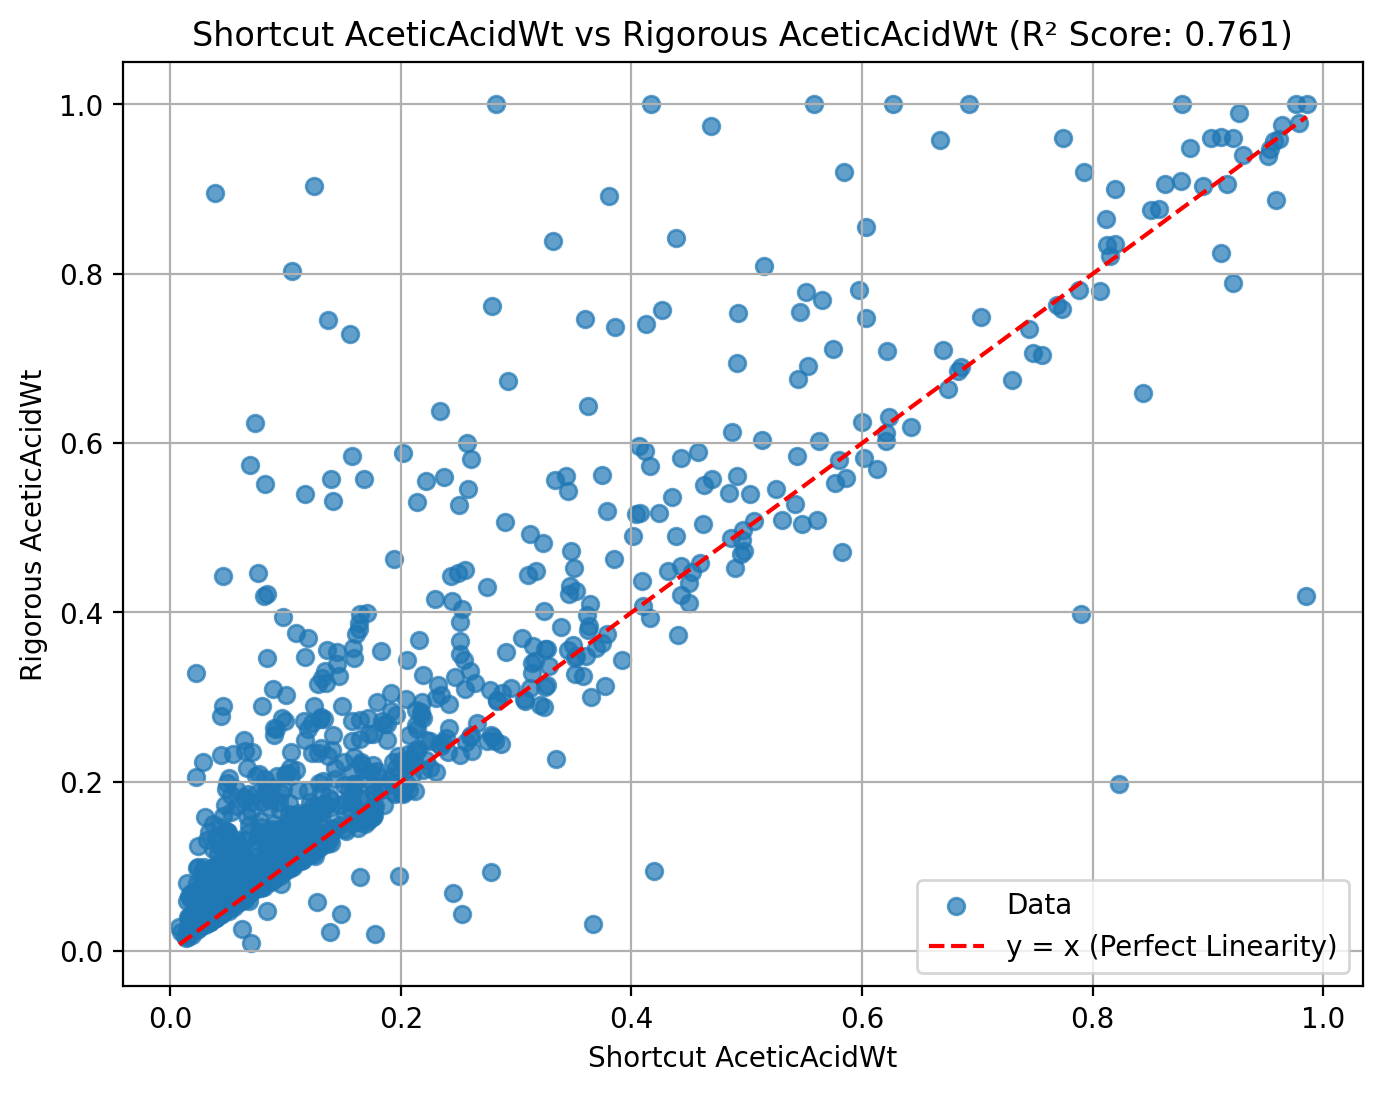

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filter out invalid or NaN results for CAPEX
valid_results = results_df.dropna(subset=['Shortcut_AceticAcidWt', 'Rigorous_AceticAcidWt'])
valid_results = valid_results[(valid_results['Shortcut_AceticAcidWt'] > 0) & (valid_results['Rigorous_AceticAcidWt'] > 0) &
                                (valid_results['Shortcut_AceticAcidWt'] < 1) & (valid_results['Rigorous_AceticAcidWt'] < 1)]

# Scatter plot for CAPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_AceticAcidWt'], valid_results['Rigorous_AceticAcidWt'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_AceticAcidWt'].min(), valid_results['Rigorous_AceticAcidWt'].min())
max_val = min(valid_results['Shortcut_AceticAcidWt'].max(), valid_results['Rigorous_AceticAcidWt'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")



# Calculate R² score to check linearity
X = valid_results[['Shortcut_AceticAcidWt']].values
y = valid_results['Rigorous_AceticAcidWt'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} (1.0이면 완전 선형, 0에 가까울수록 비선형)")

plt.xlabel('Shortcut AceticAcidWt')
plt.ylabel('Rigorous AceticAcidWt')
plt.title(f'Shortcut AceticAcidWt vs Rigorous AceticAcidWt (R² Score: {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()


# 경제 지표 시각화

R² Score: 0.8535 (1.0이면 완전 선형, 0에 가까울수록 비선형)


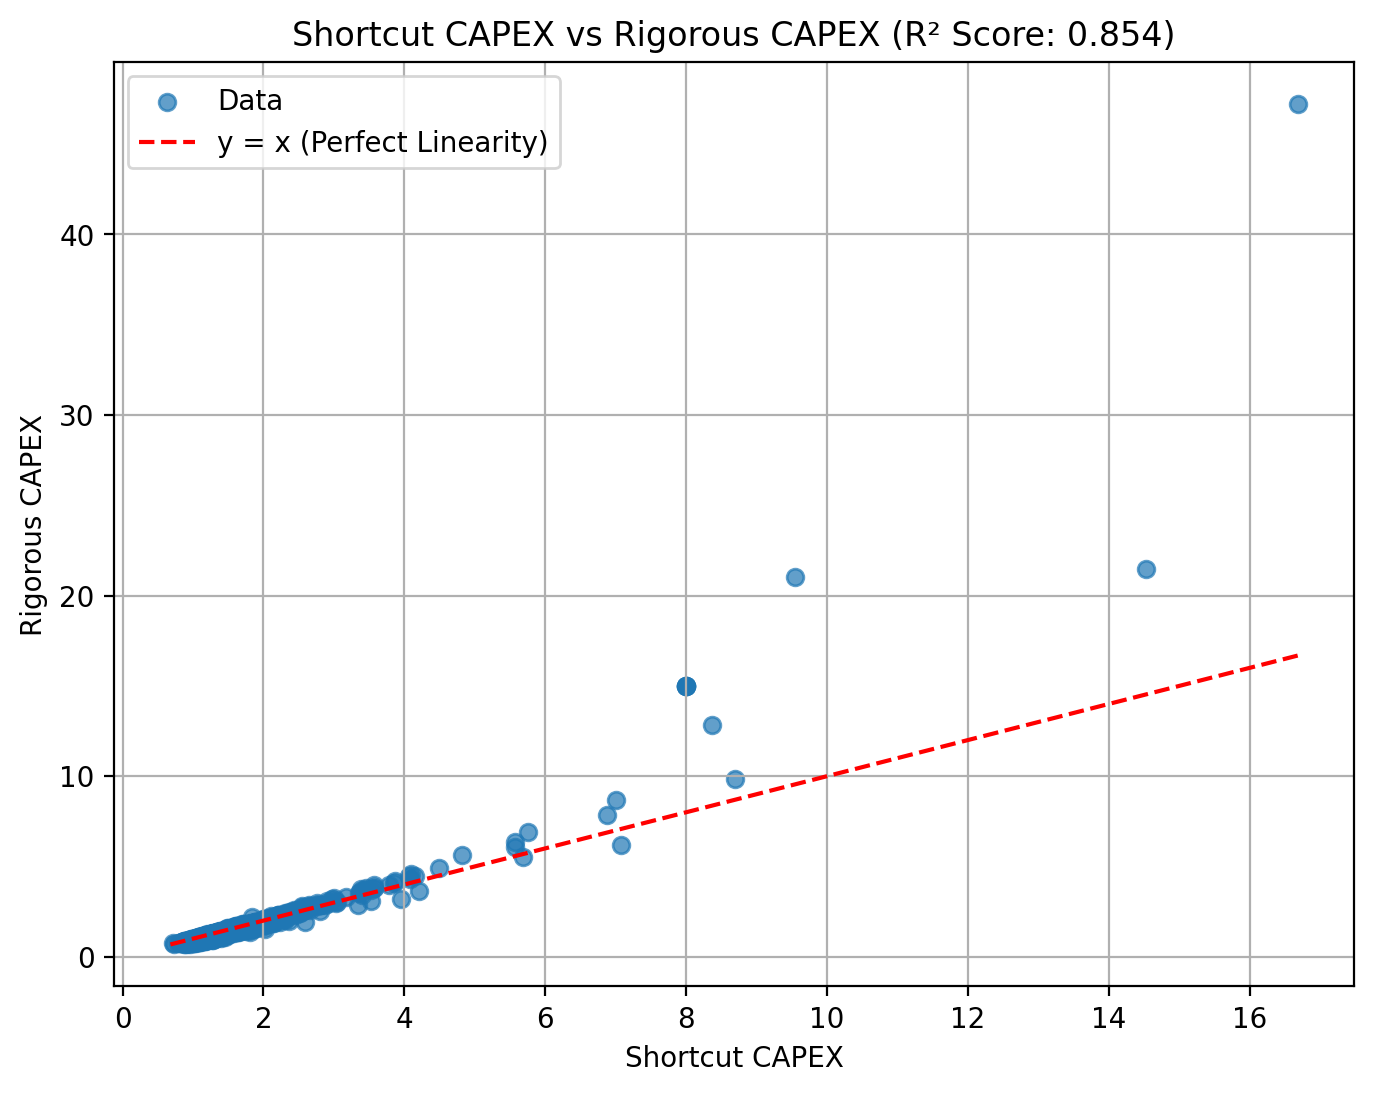

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filter out invalid or NaN results for CAPEX
valid_results = results_df.dropna(subset=['Shortcut_CAPEX', 'Rigorous_CAPEX'])
valid_results = valid_results[(valid_results['Shortcut_CAPEX'] > 0) & (valid_results['Rigorous_CAPEX'] > 0)]

# Scatter plot for CAPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_CAPEX'], valid_results['Rigorous_CAPEX'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_CAPEX'].min(), valid_results['Rigorous_CAPEX'].min())
max_val = min(valid_results['Shortcut_CAPEX'].max(), valid_results['Rigorous_CAPEX'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")



# Calculate R² score to check linearity
X = valid_results[['Shortcut_CAPEX']].values
y = valid_results['Rigorous_CAPEX'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} (1.0이면 완전 선형, 0에 가까울수록 비선형)")

plt.xlabel('Shortcut CAPEX')
plt.ylabel('Rigorous CAPEX')
plt.title(f'Shortcut CAPEX vs Rigorous CAPEX (R² Score: {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()


R² Score: 0.9225 (1.0이면 완전 선형, 0에 가까울수록 비선형)


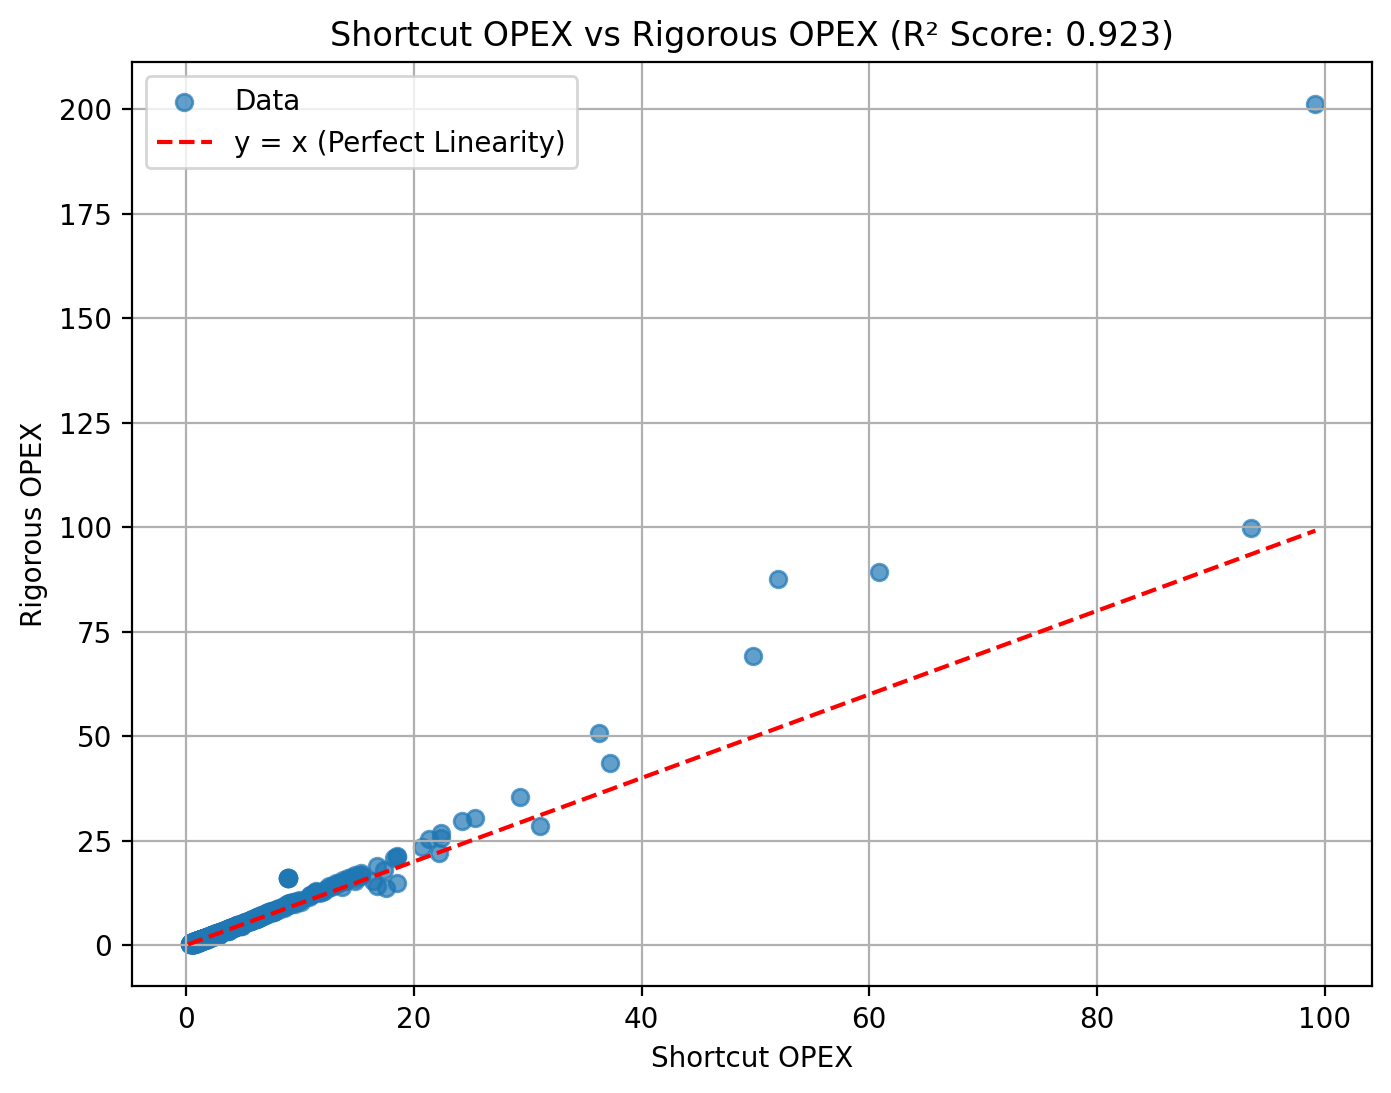

In [39]:
# Filter out invalid or NaN results
valid_results = results_df.dropna(subset=['Shortcut_OPEX', 'Rigorous_OPEX'])
valid_results = valid_results[(results_df['Shortcut_OPEX'] > 0) & (results_df['Rigorous_OPEX'] > 0)]

# Scatter plot for CAPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_OPEX'], valid_results['Rigorous_OPEX'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_OPEX'].min(), valid_results['Rigorous_OPEX'].min())
max_val = min(valid_results['Shortcut_OPEX'].max(), valid_results['Rigorous_OPEX'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")



# Calculate R² score to check linearity
X = valid_results[['Shortcut_OPEX']].values
y = valid_results['Rigorous_OPEX'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} (1.0이면 완전 선형, 0에 가까울수록 비선형)")

plt.xlabel('Shortcut OPEX')
plt.ylabel('Rigorous OPEX')
plt.title(f'Shortcut OPEX vs Rigorous OPEX (R² Score: {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
valid_results

,Stages,_Lr1,_Hr1,_Lr2,_Hr2,...,Shortcut_NumberStages,Shortcut_FeedStage,Rigorous_CAPEX,Rigorous_OPEX,Rigorous_AceticAcidWt
1,0,1,2,3,4,...,13,14,15,16,17
3,27,0.937,0.298,0.487,0.419,...,10,5,1.2,0.687,0.331
4,0,1,2,3,4,...,13,14,15,16,17
5,13,0.842,0.151,0.568,0.176,...,5,3,1.01,0.836,0.125
6,0,1,2,3,4,...,13,14,15,16,17
...,...,...,...,...,...,...,...,...,...,...,...
1727,48,0.688,0.866,0.514,0.517,...,0,0,0,0,0
1729,15,0.965,0.476,0.508,0.934,...,15,8,1.44,1.21,0.582
1732,20,0.634,0.94,0.509,0.576,...,7,6,1.46,1.97,0.103
1734,47,0.73,0.53,0.105,0.891,...,8,5,1.24,0.779,0.126


R² Score: 0.9404 )


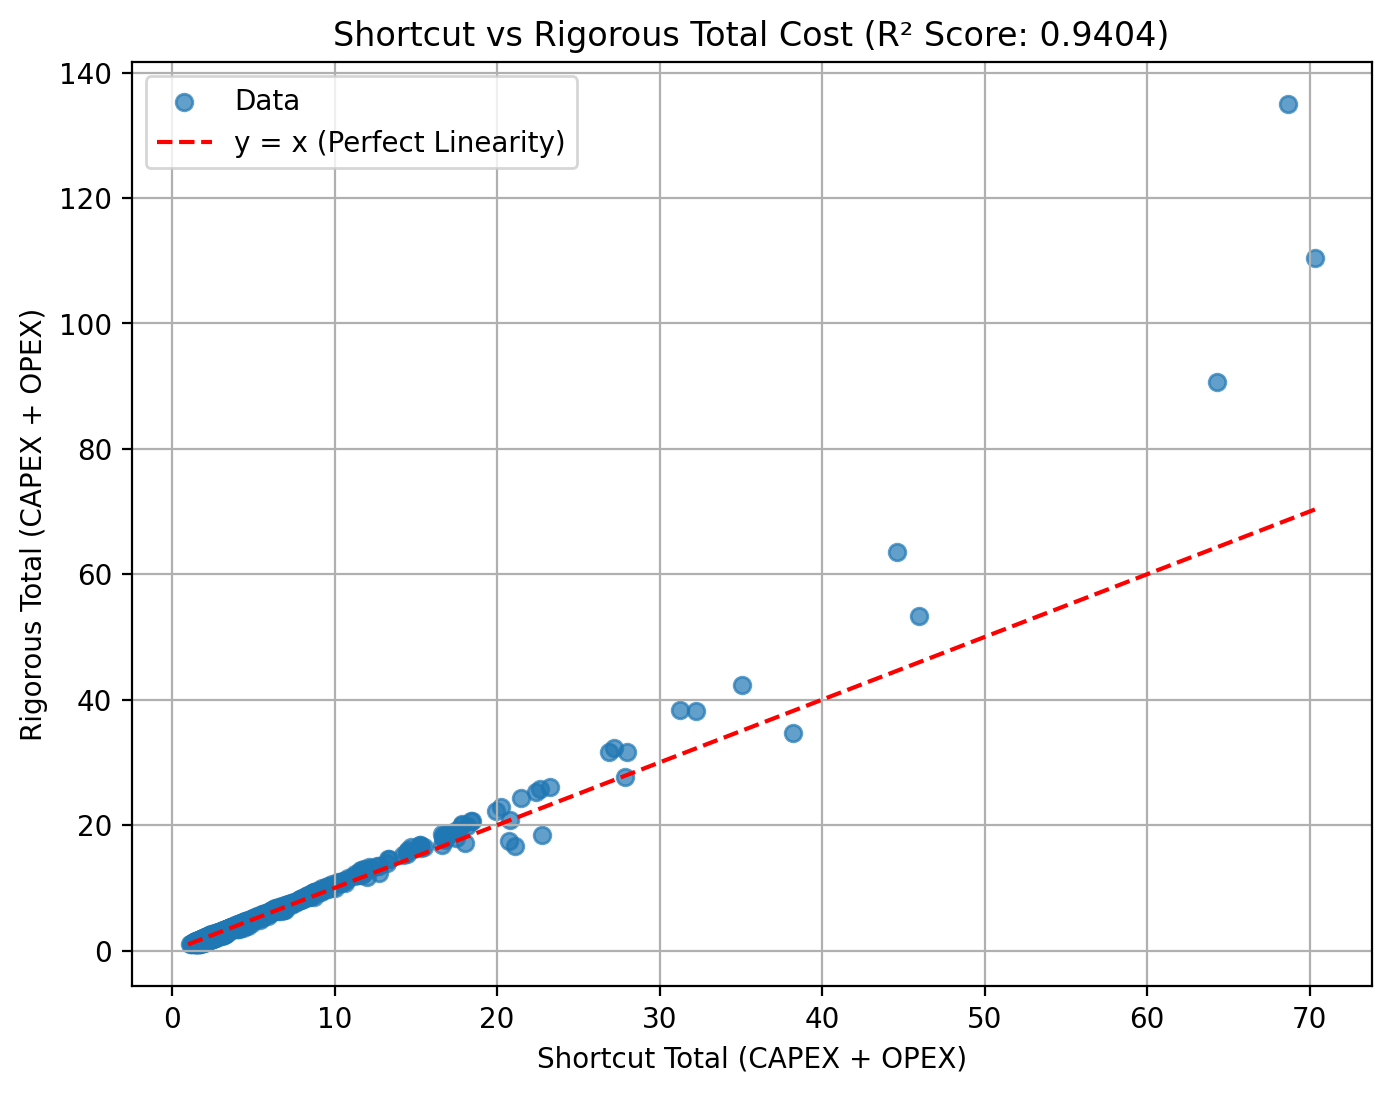

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filter out invalid or NaN results for CAPEX and OPEX
valid_results = results_df.dropna(subset=['Shortcut_CAPEX', 'Rigorous_CAPEX', 'Shortcut_OPEX', 'Rigorous_OPEX'])
valid_results = valid_results[
    (valid_results['Shortcut_CAPEX'] > 0) & (valid_results['Rigorous_CAPEX'] > 0) &
    (valid_results['Shortcut_OPEX'] > 0) & (valid_results['Rigorous_OPEX'] > 0) &
    (valid_results['Stages'] > 0) 
]

# Compute the total cost (CAPEX + OPEX)
valid_results['Shortcut_Total'] = valid_results['Shortcut_CAPEX'] + valid_results['Shortcut_OPEX']
valid_results['Rigorous_Total'] = valid_results['Rigorous_CAPEX'] + valid_results['Rigorous_OPEX']

# Scatter plot for Total CAPEX + OPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_Total'], valid_results['Rigorous_Total'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_Total'].min(), valid_results['Rigorous_Total'].min())
max_val = min(valid_results['Shortcut_Total'].max(), valid_results['Rigorous_Total'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")


# Calculate R² score to check linearity
X = valid_results[['Shortcut_Total']].values
y = valid_results['Rigorous_Total'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} )")

plt.xlabel('Shortcut Total (CAPEX + OPEX)')
plt.ylabel('Rigorous Total (CAPEX + OPEX)')
plt.title(f'Shortcut vs Rigorous Total Cost (R² Score: {r2:.4f})')
plt.legend()
plt.grid(True)
plt.show()
